In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from IPython.display import display, Latex, Math, Image

# Function for displaying expressions
def eq_disp(varstring, expr, unit=""):
    display(Latex(f"${varstring}={sp.latex(expr)} \: {unit}$"))

# Description of the dynamic system

In [2]:
# Plant parameters
m1 = 0.269
m2 = 0.511
l_1 = 0.307
l_2 = 0.307
J_1 = 1/12*m1*l_1**2
J_2 = 1/12*m2*l_2**2
c_1 = 0
c_2 = 0
g = 9.82
s = ct.tf('s')

# Plant transfer functions
G1 = ct.tf(0.005263394993448534, [0.005263394993448534, 0.025685994133333334, 0.0])
G2 = ct.tf(0.005263394993448534, [0.005263394993448534, 0.18115914453333334, 0.0])

## Block diagram

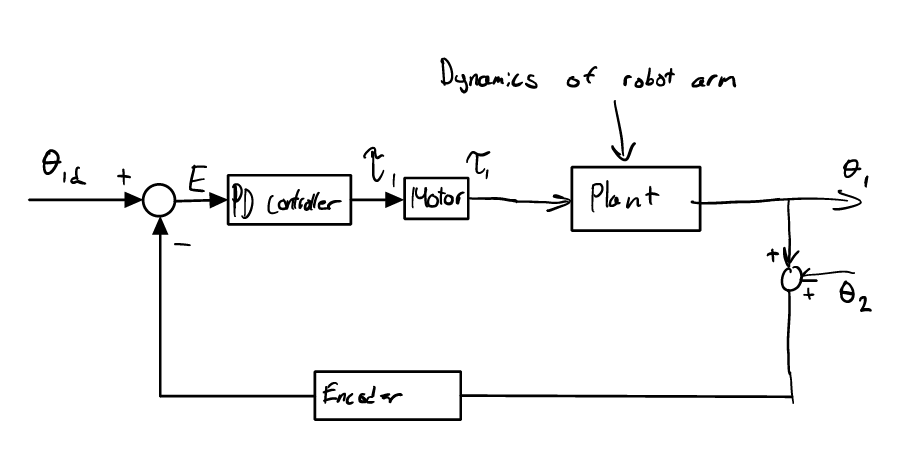

In [3]:
Image('Block diagram.png')

# PD-tuning of $\theta_1$

## Requirements

20 % overshoot, 1/2 s rise time, 1 s settling time (2 % criterion). Neglecting the dynamics of $\theta_2$ and neglecting the dynamics of the motor and encoder (setting them equal to one). Gain margin must be over 5 dB and the phase margin must be over 50$^\circ$.

## Using root locus - manual tuning

Closed loop system cannot reach marginal stabilty, as $K_p$ should be zero. The quarter amplitude decay is reached, by increasing $K_p$

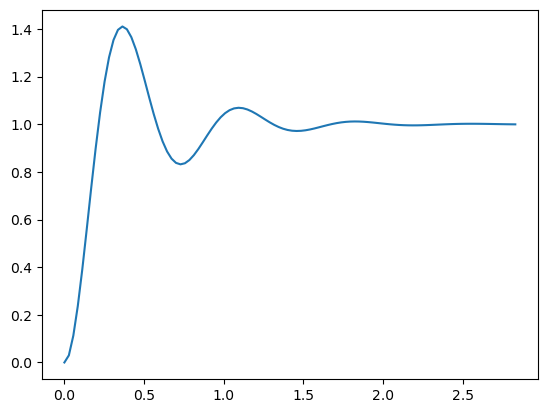

In [4]:
Kp1 = 80
Kd1 = 0
Gc1 = Kp1 + Kd1*s
L1 = Gc1*G1
T1 = ct.feedback(L1)

plt.plot(*ct.step_response(T1))

Root locus of uncompensated system with the characteristic equation found from
\begin{equation}
\frac{Y(s)}{R(s)}=\frac{KG(s)}{1+KG(s)},
\end{equation}

which gives the characteristic equation
\begin{equation}
1 + KG(s) = 0
\end{equation}

So for varying the proportional gain the root locus is


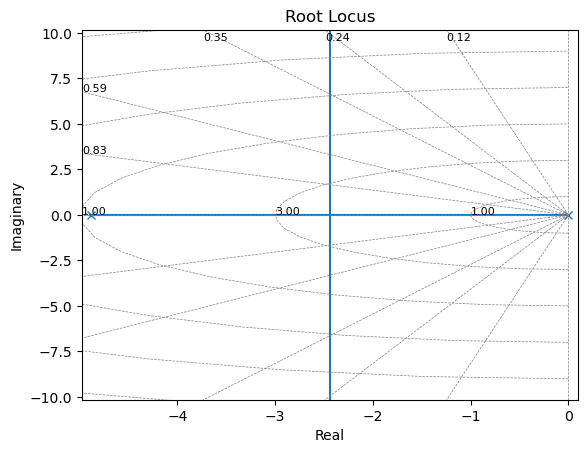

In [5]:
rlist1, klist1 = ct.rlocus(G1)

The root locus for varying the derivative gain, $K_D$

In [6]:
s*ct.tf(0.005263394993448534, [0.005263394993448534, 0.025685994133333334, Kp1])

TransferFunction(array([0.00526339, 0.        ]), array([5.26339499e-03, 2.56859941e-02, 8.00000000e+01]))

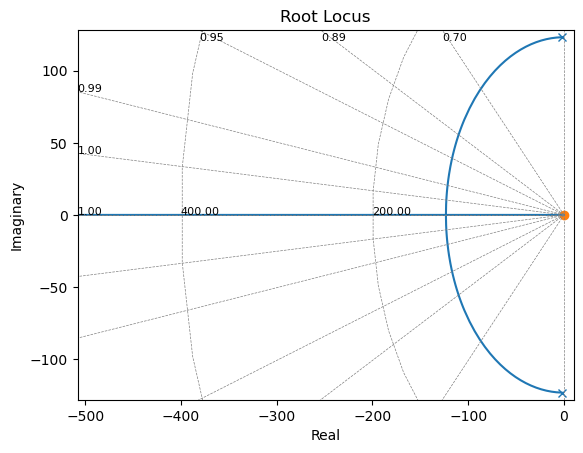

In [7]:
rlist1, klist1 = ct.rlocus(s*ct.tf(0.005263394993448534, [0.005263394993448534, 0.025685994133333334, Kp1]))

When $K_D$ increases the complex poles move to the left which
\begin{itemize}
    \item increases the associated damping ratio
    \item decrease the percent overshoot
    \item reduce the settling time
\end{itemize}

$K_D$ is chosen

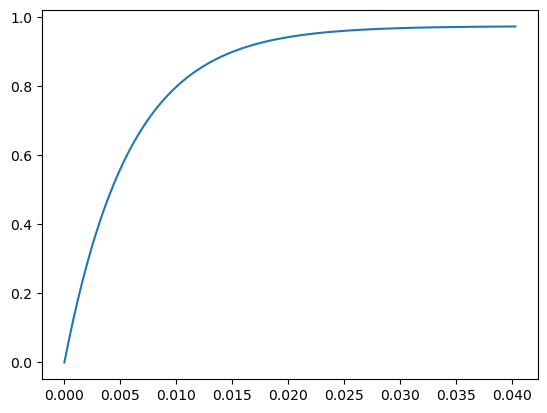

In [8]:
Kd1 = 167
Gc1 = Kp1 + Kd1*s
L1 = Gc1*G1
T1 = ct.feedback(L1)

plt.plot(*ct.step_response(T1))

## Using root locus - Ziegler-Nichols

Closed loop system cannot reach marginal stability as $K_p$ would be zero

## Using the python PID-designer

Finding $K_p$

/Users/Mathias/opt/anaconda3/lib/python3.9/site-packages/control/freqplot.py:385: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax_mag.axhline(y=0 if dB else 1, color='k', linestyle=':',


StateSpace(array([[  -4.88011904,    0.        ,    0.        ,    0.        ],
       [   1.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    1.        ,    0.        ,    0.        ],
       [   0.        ,  100.        ,    0.        , -100.        ]]), array([[  0.],
       [  0.],
       [  1.],
       [100.]]), array([[ 0., -1.,  0.,  0.]]), array([[0.]]))

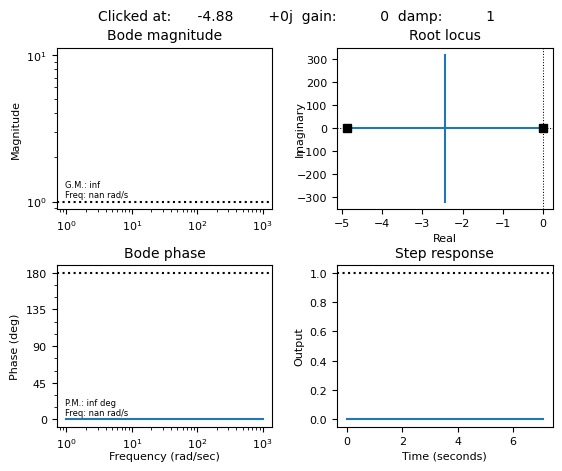

In [9]:
ct.rootlocus_pid_designer(G1)

Finding $K_D$

/Users/Mathias/opt/anaconda3/lib/python3.9/site-packages/control/freqplot.py:385: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax_mag.axhline(y=0 if dB else 1, color='k', linestyle=':',


StateSpace(array([[  -4.88011904,  -80.        ,    0.        ,    0.        ],
       [   1.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    1.        ,    0.        ,    0.        ],
       [   0.        ,  100.        ,    0.        , -100.        ]]), array([[-80.],
       [  0.],
       [  1.],
       [100.]]), array([[ 0., -1.,  0.,  0.]]), array([[0.]]))

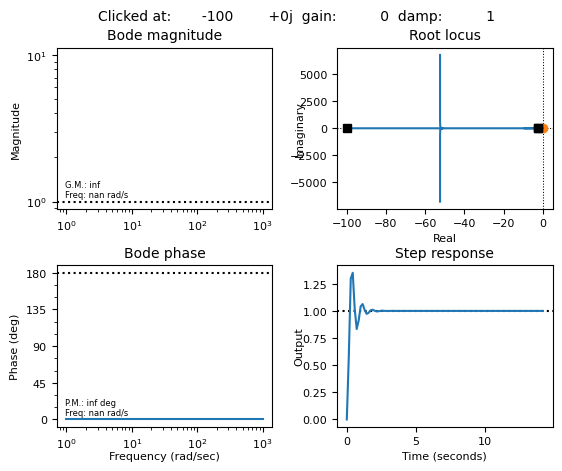

In [10]:
ct.rootlocus_pid_designer(G1, gain='D', Kp0=80)

/Users/Mathias/opt/anaconda3/lib/python3.9/site-packages/control/freqplot.py:385: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax_mag.axhline(y=0 if dB else 1, color='k', linestyle=':',


StateSpace(array([[  -4.88011904, -841.7       ,    0.        ,  761.7       ],
       [   1.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    1.        ,    0.        ,    0.        ],
       [   0.        ,  100.        ,    0.        , -100.        ]]), array([[-841.7],
       [   0. ],
       [   1. ],
       [ 100. ]]), array([[ 0., -1.,  0.,  0.]]), array([[0.]]))

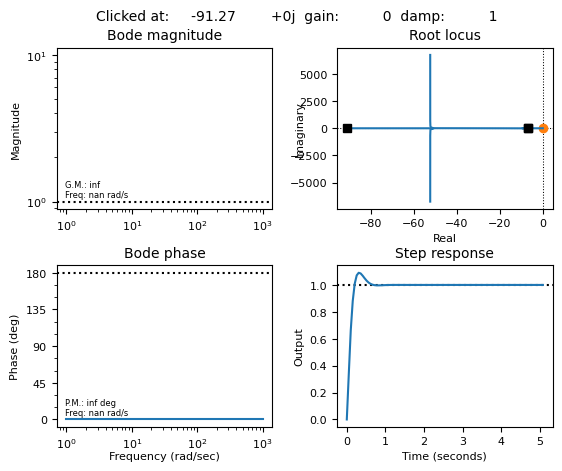

In [11]:
ct.rootlocus_pid_designer(G1, gain='D', Kp0=80, Kd0=7.617)

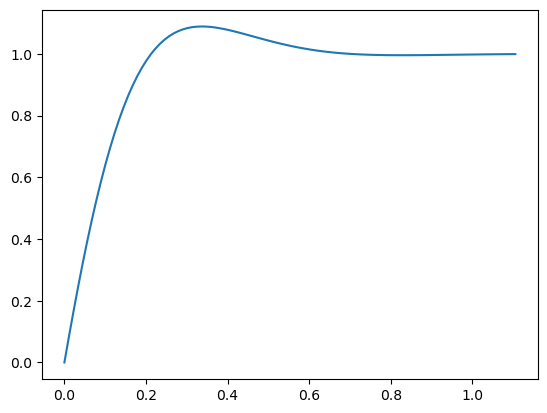

In [12]:
%matplotlib inline
Kp1 = 80
Kd1 = 7.617
Gc1 = Kp1 + Kd1*s
L1 = Gc1*G1
T1 = ct.feedback(L1)


plt.plot(*ct.step_response(T1))

In [13]:
ct.step_info(T1)

{'RiseTime': 0.15633271613877484,
 'SettlingTime': 0.580664374229735,
 'SettlingMin': 0.927990286340493,
 'SettlingMax': 1.0889978078917655,
 'Overshoot': 8.899780789176548,
 'Undershoot': 0,
 'Peak': 1.0889978078917655,
 'PeakTime': 0.3349986774402318,
 'SteadyStateValue': 1.0}

Requirements are met with these values for $K_p$ and $K_D$

# Using frequency response methods

## Bode plot

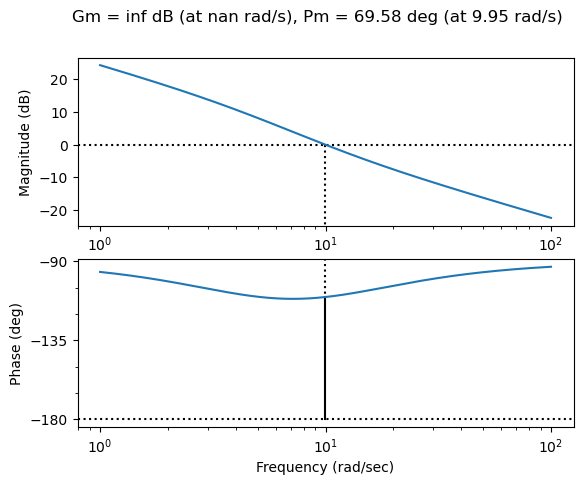

In [14]:
mag1, pm1, wg1 = ct.bode(L1, margins=True, dB=True)

The phase and gain margin are acceptable. Calculating the bandwidth

In [15]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idx = find_nearest(ct.mag2db(mag1), -3)

omega_B1 = wg1[idx]

eq_disp('\\omega_B', round(omega_B1,3), 'rad/s')

<IPython.core.display.Latex object>

## Nyquist plot

The number of encirclements of the -1 point is displayed and the nyquist plot is made:

0

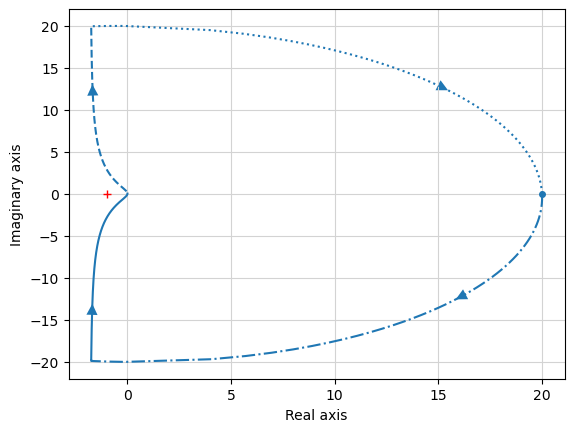

In [16]:
ct.nyquist_plot(L1)

## Nichols plot

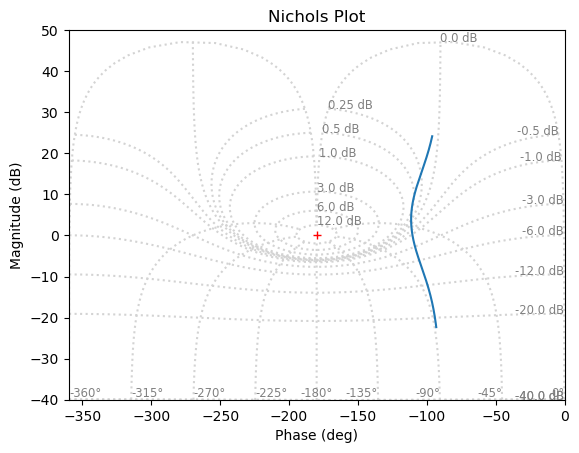

In [17]:
ct.nichols_plot(L1)

# PD-tuning of $\theta_2$

## Requirements

The same requirements as for $\theta_1$ are used.

## Using root locus - manual tuning

Closed loop system cannot reach marginal stabilty, as $K_p$ should be zero. The quarter amplitude decay is reached, by increasing $K_p$

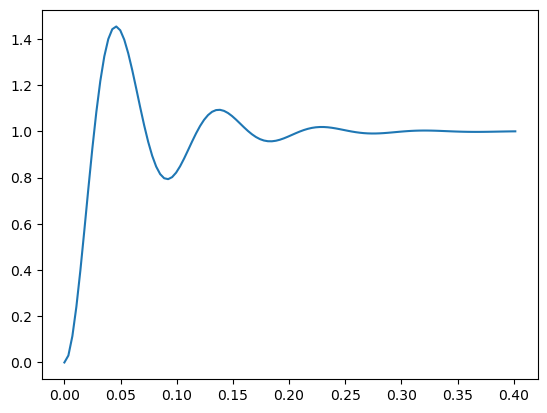

In [18]:
Kp2 = 5000
Kd2 = 0
Gc2 = Kp2 + Kd2*s
L2 = Gc2*G2
T2 = ct.feedback(L2)

plt.plot(*ct.step_response(T2))

Root locus of uncompensated system with the characteristic equation found from
\begin{equation}
\frac{Y(s)}{R(s)}=\frac{KG(s)}{1+KG(s)},
\end{equation}

which gives the characteristic equation
\begin{equation}
1 + KG(s) = 0
\end{equation}

So for varying the proportional gain the root locus is


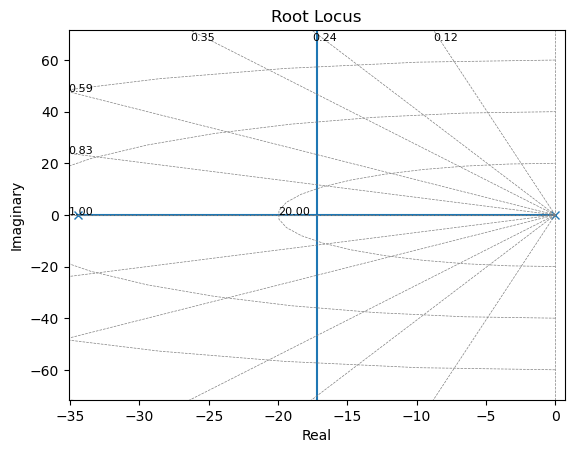

In [19]:
rlist1, klist1 = ct.rlocus(G2)

The root locus for varying the derivative gain, $K_D$

In [20]:
s*ct.tf(0.005263394993448534, [0.005263394993448534, 0.18115914453333334, Kp2])

TransferFunction(array([0.00526339, 0.        ]), array([5.26339499e-03, 1.81159145e-01, 5.00000000e+03]))

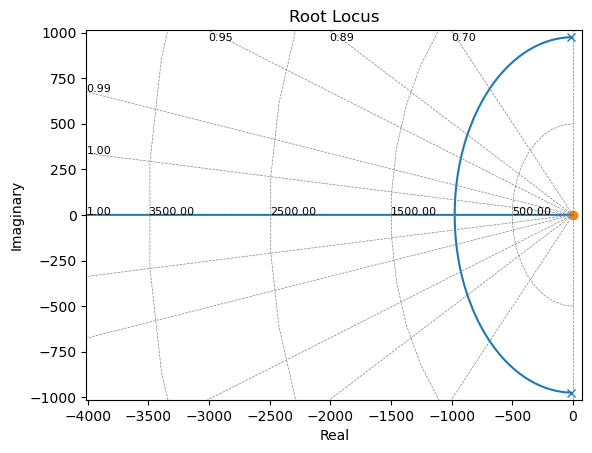

In [21]:
rlist1, klist1 = ct.rlocus(s*ct.tf(0.005263394993448534, [0.005263394993448534, 0.18115914453333334, Kp2]))

When $K_D$ increases the complex poles move to the left which
\begin{itemize}
    \item increases the associated damping ratio
    \item decrease the percent overshoot
    \item reduce the settling time
\end{itemize}

$K_D$ is chosen

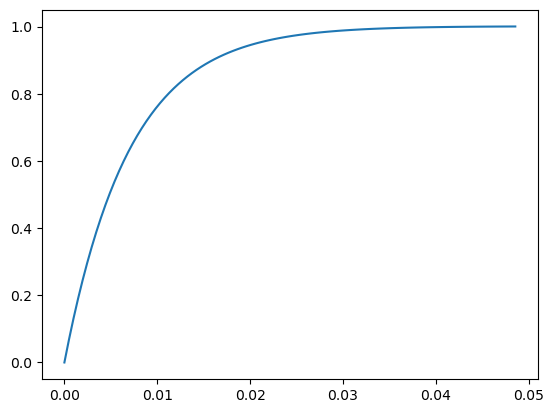

In [22]:
Kd2 = 143
Gc2 = Kp2 + Kd2*s
L2 = Gc2*G2
T2 = ct.feedback(L2)

plt.plot(*ct.step_response(T2))

## Using root locus - Ziegler-Nichols

Closed loop system cannot reach marginal stability as $K_p$ would be zero

## Using the python PID-designer

Finding $K_p$

/Users/Mathias/opt/anaconda3/lib/python3.9/site-packages/control/freqplot.py:385: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax_mag.axhline(y=0 if dB else 1, color='k', linestyle=':',


StateSpace(array([[ -34.41868694,    0.        ,    0.        ,    0.        ],
       [   1.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    1.        ,    0.        ,    0.        ],
       [   0.        ,  100.        ,    0.        , -100.        ]]), array([[  0.],
       [  0.],
       [  1.],
       [100.]]), array([[ 0., -1.,  0.,  0.]]), array([[0.]]))

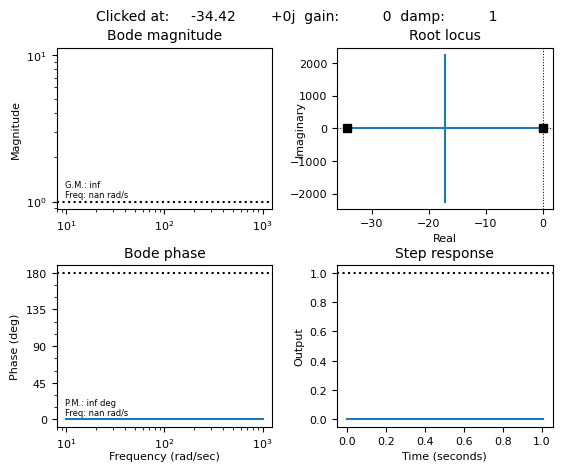

In [23]:
ct.rootlocus_pid_designer(G2)

Finding $K_D$

/Users/Mathias/opt/anaconda3/lib/python3.9/site-packages/control/freqplot.py:385: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax_mag.axhline(y=0 if dB else 1, color='k', linestyle=':',


StateSpace(array([[ -34.41868694, -616.        ,    0.        ,    0.        ],
       [   1.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    1.        ,    0.        ,    0.        ],
       [   0.        ,  100.        ,    0.        , -100.        ]]), array([[-616.],
       [   0.],
       [   1.],
       [ 100.]]), array([[ 0., -1.,  0.,  0.]]), array([[0.]]))

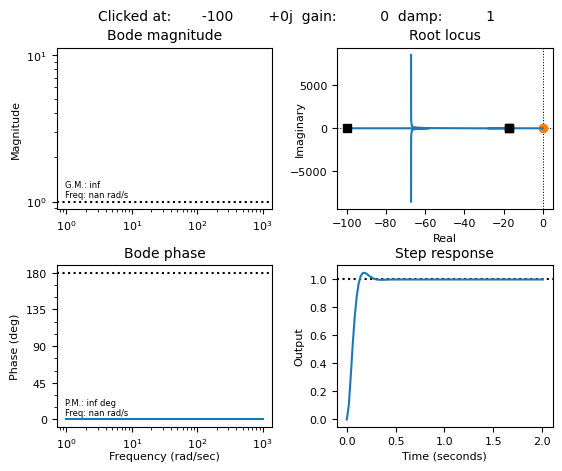

In [24]:
ct.rootlocus_pid_designer(G2, gain='D', Kp0=616)

/Users/Mathias/opt/anaconda3/lib/python3.9/site-packages/control/freqplot.py:385: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax_mag.axhline(y=0 if dB else 1, color='k', linestyle=':',


StateSpace(array([[-3.44186869e+01, -1.22900000e+03,  0.00000000e+00,
         6.13000000e+02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
        -1.00000000e+02]]), array([[-1.229e+03],
       [ 0.000e+00],
       [ 1.000e+00],
       [ 1.000e+02]]), array([[ 0., -1.,  0.,  0.]]), array([[0.]]))

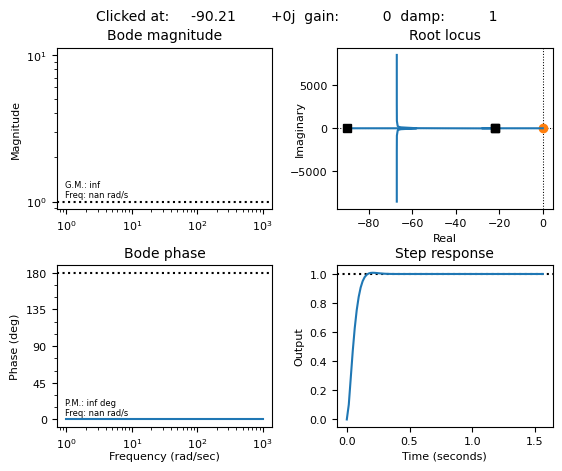

In [25]:
ct.rootlocus_pid_designer(G2, gain='D', Kp0=616, Kd0=6.13)

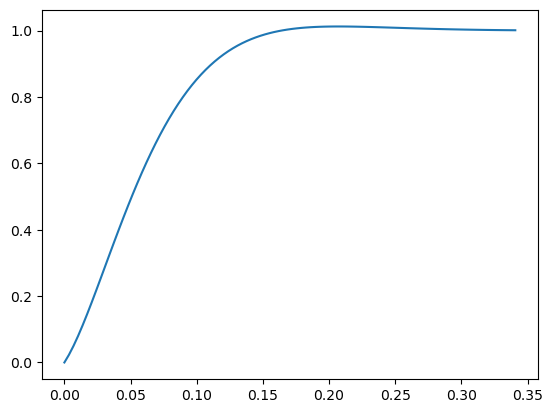

In [26]:
%matplotlib inline
Kp2 = 616
Kd2 = 6.13
Gc2 = Kp2 + Kd2*s
L2 = Gc2*G2
T2 = ct.feedback(L2)


plt.plot(*ct.step_response(T2))

In [27]:
ct.step_info(T2)

{'RiseTime': 0.0998051489301589,
 'SettlingTime': 0.14798694496540804,
 'SettlingMin': 0.9068573808327912,
 'SettlingMax': 1.0121702730815116,
 'Overshoot': 1.2170273081511753,
 'Undershoot': 0,
 'Peak': 1.0121702730815116,
 'PeakTime': 0.20649341157963913,
 'SteadyStateValue': 0.9999999999999999}

Requirements are met with these values for $K_p$ and $K_D$

## Using frequency response methods

## Bode plot

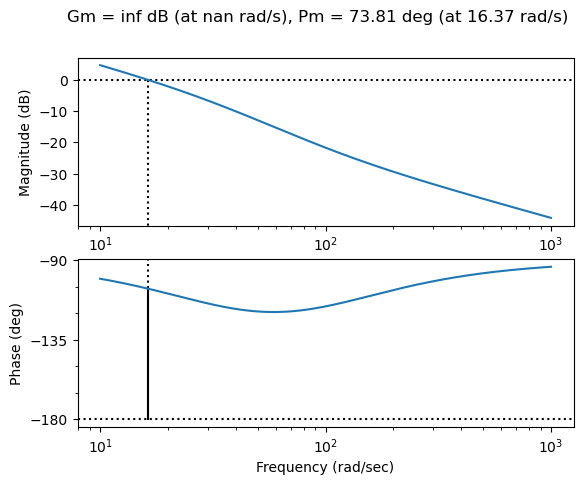

In [28]:
mag2, pm2, wg2 = ct.bode(L2, margins=True, dB=True)

The phase and gain margin are acceptable. Calculating the bandwidth

In [29]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idx = find_nearest(ct.mag2db(mag2), -3)

omega_B2 = wg2[idx]

eq_disp('\\omega_B', round(omega_B2,3), 'rad/s')

<IPython.core.display.Latex object>

## Nyquist plot

The number of encirclements of the -1 point is displayed and the nyquist plot is made:

0

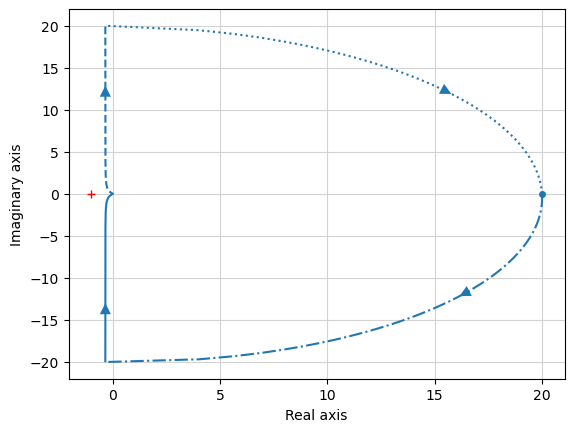

In [30]:
ct.nyquist_plot(L2)

## Nichols plot

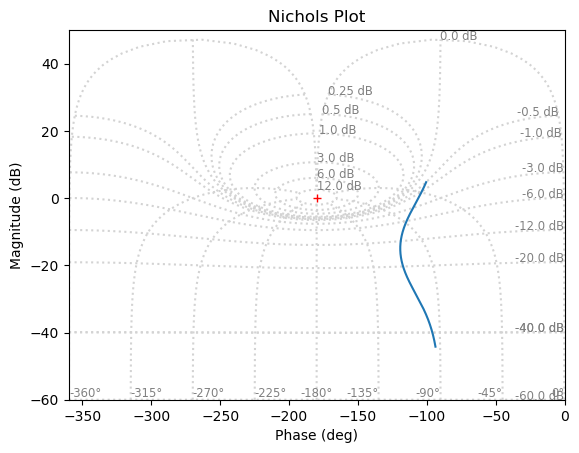

In [31]:
ct.nichols_plot(L2)